In [ ]:
pip -q install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Importing libs
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

2023-09-26 11:03:37.321604: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 11:03:39.690302: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 11:03:39.698886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 11:03:44.312229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#grab the MNIST dataset
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...


In [ ]:
#MNIST

# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 784))
xtest_nonreshape = testX.reshape((testX.shape[0], 28, 28))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [ ]:
trainX.shape

(60000, 784)

In [ ]:
#CIFAR10

# each image in the CIFAR10 dataset is represented as a 32x32x3
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 32x32= pixels
trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
#xtest_nonreshape = testX.reshape((testX.shape[0], 32, 32))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))

In [ ]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
#MNIST

# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
#CIFAR10

# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200, batch_size=128)

[INFO] training network...
Epoch 1/200
469/469 [==============================] - 2s 2ms/step - loss: 2.2851 - accuracy: 0.1625 - val_loss: 2.2478 - val_accuracy: 0.3316
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 2.2169 - accuracy: 0.3535 - val_loss: 2.1778 - val_accuracy: 0.4462
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 2.1365 - accuracy: 0.5069 - val_loss: 2.0803 - val_accuracy: 0.5661
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 2.0201 - accuracy: 0.5953 - val_loss: 1.9373 - val_accuracy: 0.6528
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 1.8522 - accuracy: 0.6434 - val_loss: 1.7389 - val_accuracy: 0.6537
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 1.6399 - accuracy: 0.6834 - val_loss: 1.5116 - val_accuracy: 0.7111
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 1.4204 - accuracy: 0.7172 - val_loss: 1.

Epoch 58/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.9090 - val_loss: 0.3064 - val_accuracy: 0.9129
Epoch 59/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.9094 - val_loss: 0.3048 - val_accuracy: 0.9127
Epoch 60/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.9099 - val_loss: 0.3035 - val_accuracy: 0.9140
Epoch 61/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3128 - accuracy: 0.9105 - val_loss: 0.3018 - val_accuracy: 0.9140
Epoch 62/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3112 - accuracy: 0.9105 - val_loss: 0.3006 - val_accuracy: 0.9143
Epoch 63/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3096 - accuracy: 0.9111 - val_loss: 0.2993 - val_accuracy: 0.9140
Epoch 64/200
469/469 [==============================] - 1s 2ms/step - loss: 0.3081 - accuracy: 0.9115 - val_loss: 0.2980 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2552 - accuracy: 0.9260 - val_loss: 0.2515 - val_accuracy: 0.9272
Epoch 116/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.9260 - val_loss: 0.2511 - val_accuracy: 0.9281
Epoch 117/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2536 - accuracy: 0.9265 - val_loss: 0.2508 - val_accuracy: 0.9278
Epoch 118/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2528 - accuracy: 0.9267 - val_loss: 0.2499 - val_accuracy: 0.9280
Epoch 119/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.9266 - val_loss: 0.2492 - val_accuracy: 0.9283
Epoch 120/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2512 - accuracy: 0.9269 - val_loss: 0.2479 - val_accuracy: 0.9287
Epoch 121/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2504 - accuracy: 0.9274 - val_loss: 0.2473 - val_ac

469/469 [==============================] - 1s 2ms/step - loss: 0.2153 - accuracy: 0.9383 - val_loss: 0.2158 - val_accuracy: 0.9370
Epoch 172/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2147 - accuracy: 0.9385 - val_loss: 0.2156 - val_accuracy: 0.9373
Epoch 173/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2141 - accuracy: 0.9388 - val_loss: 0.2148 - val_accuracy: 0.9380
Epoch 174/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2134 - accuracy: 0.9388 - val_loss: 0.2145 - val_accuracy: 0.9374
Epoch 175/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2128 - accuracy: 0.9391 - val_loss: 0.2136 - val_accuracy: 0.9377
Epoch 176/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2122 - accuracy: 0.9391 - val_loss: 0.2131 - val_accuracy: 0.9373
Epoch 177/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2115 - accuracy: 0.9397 - val_loss: 0.2127 - val_accuracy: 0.9374

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.93      0.94      0.93      1010
           4       0.93      0.94      0.94       982
           5       0.94      0.90      0.92       892
           6       0.94      0.95      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.92      0.92      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



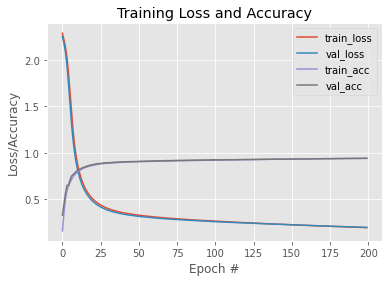

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 200), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 200), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 200), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 200), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('output.png')

313/313 [==============================] - 0s 617us/step
The predicted value is 1


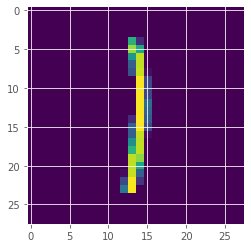

In [ ]:
import random

r = random.randint(0,100)
#r = 0
plt.imshow(xtest_nonreshape[r])

prediction = model.predict(testX)
print(f"The predicted value is {np.argmax(prediction[r])}")